<a href="https://colab.research.google.com/github/AlexandreXavierMartins/PST/blob/main/BuscaTabuPST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Implementação BT para PST
import math
import numpy as np
import matplotlib.pyplot as plt
inf = math.inf

def gera_sol_rand(n):
  sol = np.arange(1, n)
  np.random.shuffle(sol)
  sol = np.insert(sol, 0, 0)
  return sol

def calcula_fo(sol, tempos):
  fo = 0
  for i in range(1, len(sol)):
    fo = fo + tempos[sol[i]][sol[i-1]]
  return fo



tempos =  [
           [inf, inf, inf, inf, inf, inf, inf, inf],
           [5, inf, 3, 9, 4, 2, 6, 7],
           [3, 3, inf, 6, 2, 3, 5, 4],
           [4, 9, 6, inf, 7, 2, 6, 1],
           [7, 4, 2, 7, inf, 4, 8, 2],
           [2, 2, 3, 3, 4, inf, 1, 3],
           [1, 6, 5, 5, 8, 1, inf, 5],
           [3, 7, 4, 1, 2, 3, 5, inf]
           ]
#ESTATÍSTICAS------------------------#
fo_inicial = []
fo_final = []
xlabel = []
media = 0
#------------------------------------#
n = 8
#print(tempos)
TamLista = 4
BTmax = 2*n
experimentos = 30
#criar uma matriz nxn com todos os elementos iguais a zero
MatrizTabu = np.zeros((n, n))
#print(MatrizTabu)

for e in range(experimentos):
  np.random.seed(e+1)
  sol = n*[0] #Vetor para guardar a Solução
  sol_star = n*[0]
  sol = gera_sol_rand(n)
  fo = calcula_fo(sol, tempos)
  sol_star = sol.copy()
  fo_star = fo
  fo_inicial.append(fo)
  print('Solução inicial', fo)
  iter = 0
  Melhor_iter = 0
  Lista = n*[0]
  while iter - Melhor_iter < BTmax:
    iter = iter + 1
    melhor_viz = inf
    bi = -1
    for i in range(1,n-1):
      for j in range(i+1, n):
        sol[i], sol[j] = sol[j], sol[i] #Troca
        nfo = calcula_fo(sol, tempos)
        if nfo < melhor_viz:
          if MatrizTabu[i][j] < iter:
            #print(nfo, '<', melhor_viz, '.', MatrizTabu[i][j], '<', iter)
            melhor_viz = nfo
            bi = i
            bj = j
          else:
            if nfo < fo_star:
              #print(nfo, '<', fo_star)
              melhor_viz = nfo
              bi = i
              bj = j

        sol[i], sol[j] = sol[j], sol[i] #Destroca
    #Atualiza a Lista tabu
    if bi != -1:
      MatrizTabu[bi][bj] = int(iter + TamLista)
      MatrizTabu[bj][bi] = int(iter + TamLista)
      sol[bi], sol[bj] = sol[bj], sol[bi]
      fo = melhor_viz
      #print(sol, 'fo =', fo)
      if fo < fo_star:
        fo_star = fo
        Melhor_iter = iter
        sol_star = sol.copy()
        print('Melhorou - Nova fo', fo_star, 'Iter =', iter)

  #Fim While
  fo_final.append(fo_star)
  xlabel.append(e)
  media = media + fo_star


media = media/experimentos
#print('Melhor solução = ', fo_star)
#print('Melhor iteração =', best_iter)
print('Média = ', media)
#plt.scatter(xlabel, fo_inicial)
plt.scatter(xlabel, fo_final)
plt.title("FO em cada Experimento", fontsize = 15, fontweight = 'bold')
plt.xlabel("Experimento", fontsize = 12, fontweight = 'bold')
plt.ylabel("Função Objetivo", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight='bold')
plt.show()


In [17]:
!pip install ypstruct

  Preparing metadata (setup.py) ... done
  Created wheel for ypstruct: filename=ypstruct-0.0.2-py3-none-any.whl size=2952 sha256=a00d89ccf457ec9520bd6f7d634c0a94496b2f060cddbb08fceaec2af460d2c5
  Stored in directory: /root/.cache/pip/wheels/06/01/e9/d86f23cca6d6caa8e0e9916202c43561cab19cffc20be70ac1
Successfully built ypstruct


Melhorou
struct({'vetor': [0, 1, 1, 0, 1, 1, 1, 1], 'fo': 7})
Melhorou
struct({'vetor': [1, 1, 1, 0, 0, 1, 0, 0], 'fo': 12})
Melhorou
struct({'vetor': [0, 0, 0, 1, 0, 1, 1, 0], 'fo': 14})
struct({'vetor': [0, 1, 1, 1, 1, 0, 1, 0], 'fo': 6})
struct({'vetor': [1, 0, 1, 1, 0, 1, 1, 0], 'fo': 10})
struct({'vetor': [0, 1, 0, 1, 1, 1, 1, 1], 'fo': -1})
struct({'vetor': [0, 1, 0, 1, 1, 1, 1, 0], 'fo': 9})
struct({'vetor': [1, 0, 0, 1, 1, 0, 1, 0], 'fo': 9})
struct({'vetor': [1, 0, 0, 0, 0, 0, 1, 1], 'fo': 13})
struct({'vetor': [0, 0, 0, 1, 1, 0, 1, 0], 'fo': 13})
struct({'vetor': [0, 0, 0, 1, 0, 1, 1, 0], 'fo': 14})
Geração  0
Geração  1
Geração  2
Geração  3
Melhorou
struct({'vetor': [0, 1, 0, 1, 0, 1, 1, 0], 'fo': 15})
Geração  4
Melhorou
struct({'vetor': [0, 0, 1, 1, 0, 1, 1, 0], 'fo': 16})
Geração  5
Geração  6
Geração  7
Geração  8
Geração  9
Média =  16.0


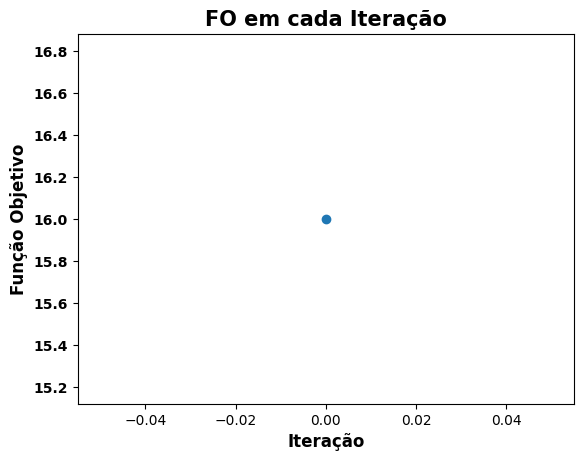

In [20]:

import numpy as np
import math
import matplotlib.pyplot as plt
from ypstruct import structure

def calcula_fo(b, p, s, n, cap, pena):
  fo = 0
  pt = 0
  for i in range(n):
    fo = fo + s[i]*b[i]
    pt = pt + s[i]*p[i]
  if pt > cap:
    #print('Solução inviável')
    fo = fo -pena*(pt - cap)
  return fo

def gera_sol(s, n):
  for i in range(n):
    s[i] = np.random.randint(2)
  return s

#Primeira metade do p1 e segunda de p2
def crossover(p1, p2, n):
  filho = p2.deepcopy()
  for i in range(n//2):
    filho.vetor[i] = p1.vetor[i]
  return filho


#DADOS DO PROBLEMA-------------------#
n = 8 #Quantidade de objetos
beneficio = [4, 3, 2, 6, 2, 3, 5, 4]
peso =      [5, 4, 3, 9, 4, 2, 6, 7]
cap = 20 #Capacidade da mochila
#------------------------------------#
#ESTATÍSTICAS------------------------#
fo_inicial = []
fo_final = []
xlabel = []
media = 0
#------------------------------------#
#PARÂMETROS--------------------------#
penalidade = 2 #Penalidade por solução inviável
maxit = 10
npop = 10
mutation = 0.05
#------------------------------------#

experimentos = 1
#Estrutura da Solução
cromossomo = structure()
cromossomo.vetor = None #Vetor com a solução que pode ser localizada pelo id
cromossomo.fo = None #Função objetivo de cada solução

for seed in range(experimentos):
  xlabel.append(seed)
  np.random.seed(seed)
  #Geração Inicial
  pop = cromossomo.repeat(npop) #Cria npop indivíduos
  #Cria um indivíduo que guarda a melhor solução
  bestsol = cromossomo
  bestsol.vetor = n*[0]
  bestsol.fo = -np.inf
  for i in range(npop):
    pop[i].vetor = n*[0]
    pop[i].vetor = gera_sol(pop[i].vetor, n)
    pop[i].fo = calcula_fo(beneficio, peso, pop[i].vetor, n, cap, penalidade)
    if pop[i].fo > bestsol.fo:
      print('Melhorou')
      bestsol = pop[i].deepcopy()
    print(pop[i])
  #print(pop)
  print(bestsol)
  #LOOP
  for it in range(maxit):
    #Cruzamento
    print('Geração ', it)
    popc = []
    for _ in range(npop//2):
      #Seleciona Pais
      per = np.random.permutation(npop) #Pegar os 2 primeiros
      #print(per)
      #print(pop[per[0]])
      #print(pop[per[1]])
      filho1 = crossover(pop[per[0]], pop[per[1]], n)
      filho2 = crossover(pop[per[1]], pop[per[0]], n)
      #print(filho1)
      #print(filho2)
      #Mutação
      for i in range(n):
        x = np.random.uniform(0, 1)
        if x < mutation:
          filho1.vetor[i] = 1 - filho1.vetor[i]
        x = np.random.uniform(0, 1)
        if x < mutation:
          filho2.vetor[i] = 1 - filho2.vetor[i]
      #Fim da mutação
      #Calcula a FO e add na população
      filho1.fo = calcula_fo(beneficio, peso, filho1.vetor, n, cap, penalidade)
      filho2.fo = calcula_fo(beneficio, peso, filho2.vetor, n, cap, penalidade)
      popc.append(filho1)
      popc.append(filho2)
      #print(filho1)
      #print(filho2)
    #Fim do Cruzamento e Mutação

    #Junta, Ordena e Seleciona
    pop = pop+popc
    pop = sorted(pop, key=lambda x: x.fo, reverse = True)
    pop = pop[0:npop]
    #print(pop[0])
    if pop[0].fo > bestsol.fo:
      print('Melhorou')
      bestsol = pop[0].deepcopy()
      print(bestsol)



  media = media + bestsol.fo
  fo_final.append(bestsol.fo)

media = media/experimentos
#print('Melhor solução = ', fo_star)
#print('Melhor iteração =', best_iter)
print('Média = ', media)
#plt.scatter(xlabel, fo_inicial)
plt.scatter(xlabel, fo_final)
plt.title("FO em cada Iteração", fontsize = 15, fontweight = 'bold')
plt.xlabel("Iteração", fontsize = 12, fontweight = 'bold')
plt.ylabel("Função Objetivo", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight='bold')
plt.show()
